In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [20]:
# Load data
OTU = pd.read_csv('data_normalized.csv',sep=',',index_col=0)
GRP = pd.read_csv('group_mpd.csv',sep=',',index_col=0)
OTU.head(10)

,S33,S29,S30,S31,S32,S34,S35,S36,S37,S38,...,S19,S28,S20,S21,S22,S23,S24,S25,S26,S27
Escherichia_Shigella,40935,32083,26454,36350,52589,31296,48244,22674,79041,80821,...,74072,97663,105692,85345,73759,100164,82888,104993,123,61226
Lactobacillus,73289,36458,94161,69822,50364,62902,71486,101385,60387,63452,...,53534,40115,43477,56424,58339,30394,44536,20739,74,41406
Rothia,2641,982,4161,3151,2761,4930,4716,7352,3652,3518,...,0,0,0,0,0,11,0,0,0,0
Enterococcus,4130,1194,2313,1489,1618,4528,3412,5174,2753,4514,...,99,482,758,621,937,805,1884,87,0,224
Enterobacteriaceae,98,0,0,0,0,12177,4413,20896,270,1296,...,213,291,35,0,18,0,8,128,0,0
Streptococcus,4728,2392,7225,6771,4761,4827,3882,5505,3253,3735,...,2899,1649,2767,3257,1833,1817,953,2576,0,2040
Staphylococcus,482,108,371,200,226,76,49,221,49,32,...,5687,700,4700,2749,3261,2552,925,437,0,1622
Romboutsia,2658,784,3340,2237,1200,177,115,353,83,191,...,15213,122,2370,899,3104,334,289,80,0,572
Proteus,1064,62,555,215,109,346,208,1912,191,181,...,0,52,0,0,88,0,27,0,0,0
Haemophilus,215,141,436,371,207,1213,528,983,329,270,...,0,0,0,0,0,0,0,0,0,0


In [21]:
GRP.head(5)

,ID,Response
S19,RS7-A1,A
S20,RS7-A2,A
S21,RS7-A3,A
S22,RS7-A4,A
S23,RS7-A5,A


In [22]:
def create_heatmap(otus_data,metadata,condition ="Response" ):
    heatmap = otus_data
    otus_data = otus_data.transpose()
    new_column = []
    new_idx = []
    for index1 in otus_data.index:
        new_idx.append(str(index1))
    otus_data.index = new_idx
    # print(otus_data)
    for index1 in otus_data.index:
        for index2 in metadata.index:
            value = metadata.loc[index2, condition]
            if str(index1) == str(index2):
                new_column.append(value)
    otus_data[condition] = new_column
    # print(otus_data)
    # Extracting the numeric part using regular expressions and creating a new column
    # otus_data[condition] = otus_data[condition].apply(lambda x: int(re.search(r'\d+', x).group()))

    # Sorting the DataFrame based on the numeric part
    otus_data = otus_data.sort_values(by=condition)
    # otus_data = otus_data.sort_values(by=condition)
    # print(otus_data)
    heatmap = otus_data.drop(columns=[condition])
    heatmap = heatmap.transpose()
    return heatmap
heatmap = create_heatmap(OTU,GRP)
heatmap.head(10)

,S23,S22,S21,S20,S19,S27,S25,S24,S28,S26,...,S32,S31,S30,S29,S37,S36,S35,S34,S38,S39
Escherichia_Shigella,100164,73759,85345,105692,74072,61226,104993,82888,97663,123,...,52589,36350,26454,32083,79041,22674,48244,31296,80821,48651
Lactobacillus,30394,58339,56424,43477,53534,41406,20739,44536,40115,74,...,50364,69822,94161,36458,60387,101385,71486,62902,63452,62344
Rothia,11,0,0,0,0,0,0,0,0,0,...,2761,3151,4161,982,3652,7352,4716,4930,3518,5519
Enterococcus,805,937,621,758,99,224,87,1884,482,0,...,1618,1489,2313,1194,2753,5174,3412,4528,4514,3780
Enterobacteriaceae,0,18,0,35,213,0,128,8,291,0,...,0,0,0,0,270,20896,4413,12177,1296,4727
Streptococcus,1817,1833,3257,2767,2899,2040,2576,953,1649,0,...,4761,6771,7225,2392,3253,5505,3882,4827,3735,4029
Staphylococcus,2552,3261,2749,4700,5687,1622,437,925,700,0,...,226,200,371,108,49,221,49,76,32,53
Romboutsia,334,3104,899,2370,15213,572,80,289,122,0,...,1200,2237,3340,784,83,353,115,177,191,182
Proteus,0,88,0,0,0,0,0,27,52,0,...,109,215,555,62,191,1912,208,346,181,129
Haemophilus,0,0,0,0,0,0,0,0,0,0,...,207,371,436,141,329,983,528,1213,270,707


In [23]:
def colordict(metadata,condition ='Response' ):
    # color_dict=dict(zip(np.unique(metadata[condition]),np.array(['red','yellow','blue','g'])))
    color_dict = {'A': 'red', 'C': '#01BEC2','B': 'green','D': 'purple'}
    row_colors = metadata[condition].map(color_dict)
    return color_dict,row_colors
color_dict,row_colors = colordict(GRP)
color_dict
# color_dict = {'PBS-PBS': 'red', 'PBS-SCB34': '#01BEC2','Lac-PBS': 'green','Lac-SCB34': 'purple'}

{'A': 'red', 'C': '#01BEC2', 'B': 'green', 'D': 'purple'}

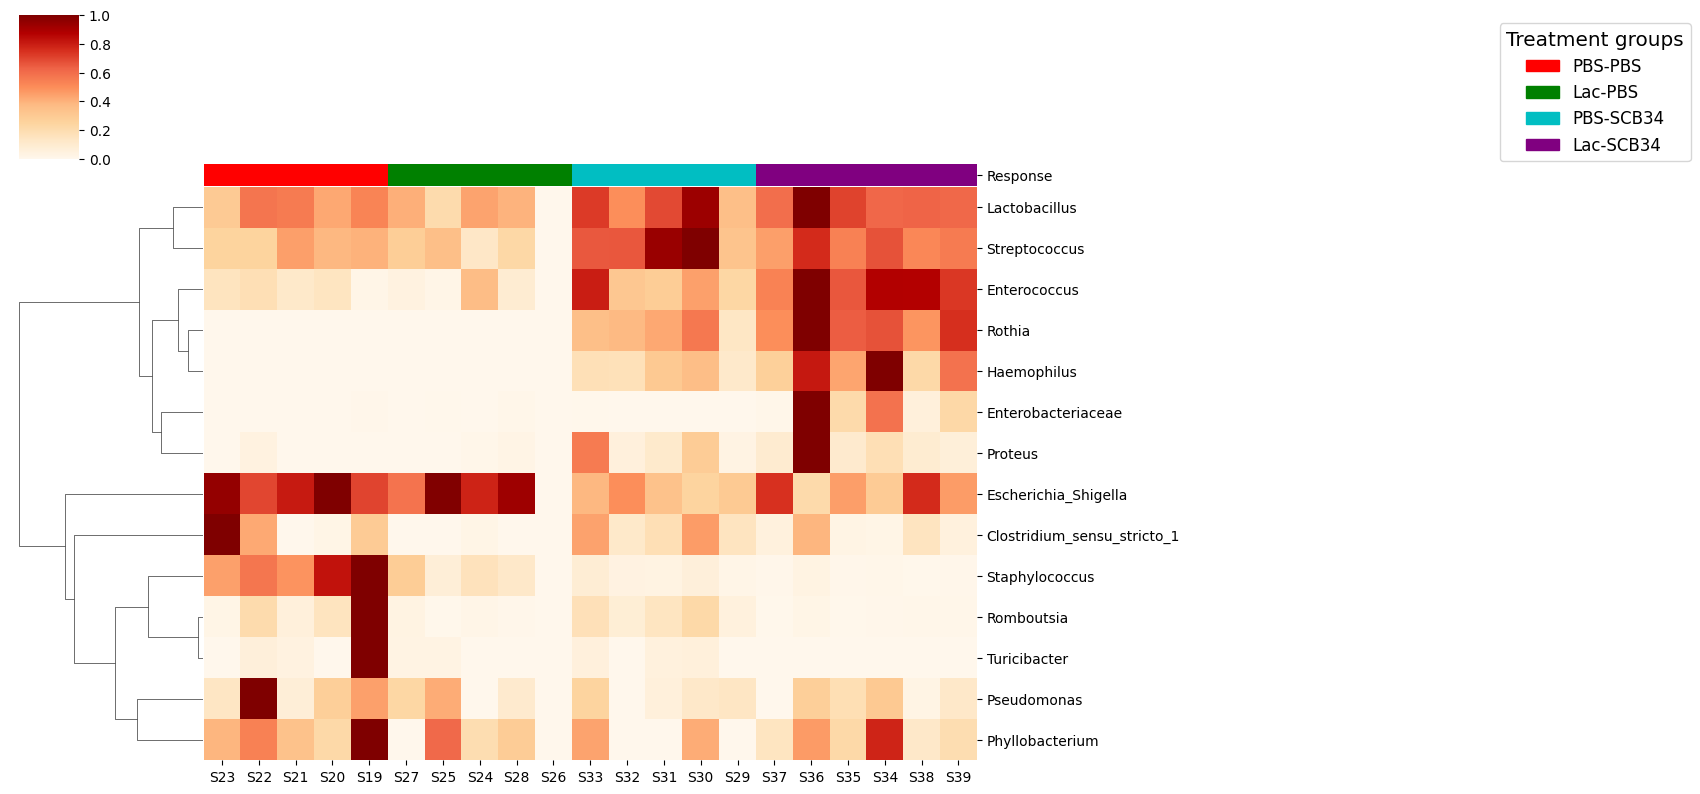

In [24]:
import matplotlib.patches as mpatches
def plot_cluster_heatmap(heatmap,color_dict,row_colors,title):
    custom_cmap = sns.color_palette("OrRd", as_cmap=True)
    hm = sns.clustermap(heatmap,
                metric="correlation",
                standard_scale=0,
                z_score=None,
                col_colors=row_colors,
                col_cluster=False,
                cmap=custom_cmap,
                # cbar_pos=(0, .2, .03, .4),
                figsize=(12, 8))
    # Create a color legend using the color_dict
    # legend_labels = [f"{experiment}" for experiment, color in color_dict.items()]
    # legend_colors = [color for _, color in color_dict.items()]
    # legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels, legend_colors)]
    # plt.legend(handles=legend_handles, title="Experiment", bbox_to_anchor=(15, 1), loc='upper left')
    # Add a title to the center of the heatmap
    ax  = hm.ax_heatmap
    ax.text(0.5, 1.1, title, fontsize=12, ha="center", va="center", transform=ax.transAxes)
    # Get the current Axes objects
    # ax_row_labels = hm.ax_row_dendrogram
    # ax_col_labels = hm.ax_col_dendrogram
    # Create a legend for 'Category' colors
    red_patch = mpatches.Patch(color='red', label='PBS-PBS')
    blue_patch = mpatches.Patch(color='#01BEC2', label='PBS-SCB34')
    green_patch = mpatches.Patch(color='green', label='Lac-PBS')
    orange_patch = mpatches.Patch(color='purple', label='Lac-SCB34')
    legend = plt.legend(handles=[red_patch, green_patch, blue_patch ,orange_patch ], title='Treatment groups',bbox_to_anchor=(28, 1), loc='upper right',fontsize='large')
    # Increase the font size of the legend
    plt.setp(legend.get_title(), fontsize='x-large')
    # # Set row and column labels font size
    # row_font_size = 4
    # col_font_size = 4

    # for label in ax_row_labels.get_yticklabels():
    #     label.set_fontsize(row_font_size)

    # for label in ax_col_labels.get_xticklabels():
    #     label.set_fontsize(col_font_size)

    # Display the plot
    plt.show()
title = ""
plot_cluster_heatmap(heatmap,color_dict,row_colors,title)